# Übungen zum Prozessieren von Seismischen Daten

<img align="right" src="map.png" width="900"> 

*Abbildung. 1: Übersicht des Illgrabens. Auf der Karte rechts zeigen die Dreiecke die seismischen Stationen an. Die Sationsnamen haben sich nach 2017 geändert: Bis einschl. 2017 waren die Stationsnamen mit Zahlen bis 10 nummeriert. Anschliessend wurde jede Stationsnummer um 10 erhöht, mit Ausnahme von ILL01, das auf ILL13 umgenannt wurde. ILL03 wurde nach 2017 nicht mehr besetzt, neu dafür ILL11.*



Dieses Jupyter Notebook erklärt grundlegende Schritte für das Prozessieren seismischer Daten. Dabei werden seismische Daten im Miniseedformat eingelesen und die Seismogramme graphisch dargestellt. Anschliessend benutzen wir konkrete Befehle, um die spektralen Eigenschaften der Seismogramme zu illustrieren und entsprechende Filter zu benutzen.

Um eine Zelle des Jupyter Notebooks auszuführen muss die Tastenkombination [shift-enter] gedrückt werden. Wenn man mit dem Mauscursor in den obigen dunkelgrauen Bereich einer Zelle klickt, kann man mit einfachen Tastenkombinationen Zellen einfügen oder löschen:

a - Zelle oberhalb der aktiven Zelle einfügen

b - Zelle unterhalb der aktiven Zelle einfügen

dd - Zelle löschen


Weitere nützliche Befehle und Werkzeuge findet man im Menü oben.


Die Programmiersprache des Jupyter Notebooks ist python, eine objektorientierte high-level Programmiersprache. Zu python gibt es viele online Hilfsmittel und Tutorials, mit denen einfache Fragen zum Syntax schnell geklärt sein sollten. Wichtig ist die Vertiefung des Quellcodes mittels Tabschlägen. So gibt es konkrete Vertiefungen z.B. für for Schleifen und Funktionsdeklarationen. Bei vektorartigen Variablen (z.B. die python tuples, Listen, numpy arrays, ...) wird der Index in eckige Klammer geschlossen ("[...]"). Funktionsargumente sind in runden Klammern eingeschlossen ("(...)"). Methoden von Objekten, wie z.B. dem numpy Objekt (für mathematische Werkzeuge), das als "np" importiert wird, werden folgendermaassen aufgerufen: np.sin() oder np.pi für die Sinusfunktion und den Wert von pi. Kommentare können in python eingefügt werden, indem das erste Feld einer Zeile mit "#" anfängt.

Dieses Jupyter Notebook verwendet das obspy Paket, das viele nützliche Funktionen für das Prozessieren seismischer Daten beinhaltet. Das Stream Objekt (hier "st" oder ähnlich genannt) beinhaltet mehrere Trace Objekte ("tr"), welche Metadaten und Zeitreihen der seismischen Messungen enthalten. Auf ein trace Objekt wird mittels eckiger Klammern zugegriffen: tr=str[0] für das erste Trace Objekt im Stream Objekt (bei python Objekten ist der tiefste Index 0 und nicht 1, wie z.B. bei matlab).

In [3]:
# Laden benötigter Module.

%matplotlib notebook
import obspy
from obspy import read
from obspy import UTCDateTime
import matplotlib.pyplot as plt
import scipy
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime
import glob
import math
from obspy import UTCDateTime, Stream, read
import scipy.fftpack
import os


In [10]:
# Zuerst werden die Daten heruntergeladen. Wir untersuchen Seismogramme eines Murganges, zweier Erdbeben und
# einer Massenbewegung (wahrscheinlich eine kleine Hangrutschung) aufgezeichnet auf Seismometern im
# und um den Illgraben (s. Abbildung 1).

# Wenn die Daten direkt vom Netz geladen werden sollen, dann können die angegebenen URL's verwendet werden.
# Falls die Daten bereits heruntergeladen wurden, dann müssen die URL's durch lokalen Pfade ersetzt werden.
# In den folgenden Zellen werden die Signale der kleinen Massenbewegung im Illgraben
# untersucht. Anschliessend soll der Code so abgeändert werden, dass die anderen Seismogramme entsprechend 
# prozessiert werden. Die Teile des Jupyter Notebooks, welche angepasst werden sollen, sind mit *A* markiert.

event_type=4

if event_type == 1:
    print("Lade Daten eines Murgangs")
    st_load=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/MURGANG/ILL11.mseed")
    st_load+=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/MURGANG/ILL12.mseed")
    st_load+=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/MURGANG/ILL13.mseed")
    st_load+=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/MURGANG/ILL14.mseed")
    st_load+=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/MURGANG/ILL16.mseed")
    st_load+=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/MURGANG/ILL17.mseed")
    st_load+=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/MURGANG/ILL18.mseed")

elif event_type == 2:
    print("Lade Daten eines teleseismischen Erdbebens")
    st_load=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/TELE/ILL01.mseed")
    st_load+=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/TELE/ILL02.mseed")
    st_load+=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/TELE/ILL03.mseed")
    st_load+=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/TELE/ILL04.mseed")
    st_load+=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/TELE/ILL08.mseed")

elif event_type == 3:
    print("Lade Daten eines lokalen Erdbebens")
    st_load=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/LOCAL/ILL01.mseed")
    st_load+=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/LOCAL/ILL02.mseed")
    st_load+=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/LOCAL/ILL03.mseed")
    st_load+=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/LOCAL/ILL04.mseed")
    st_load+=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/LOCAL/ILL08.mseed")

elif event_type == 4:
    print("Lade Daten einer Massenbewegung")
    st_load=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/SLOPE/ILL01.mseed")
    st_load+=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/SLOPE/ILL02.mseed")
    st_load+=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/SLOPE/ILL03.mseed")
    st_load+=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/SLOPE/ILL04.mseed")
    st_load+=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/SLOPE/ILL06.mseed")
    st_load+=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/SLOPE/ILL07.mseed")
    st_load+=read("http://people.ee.ethz.ch/~fwalter/download/DATEN/SLOPE/ILL08.mseed")





Lade Daten einer Massenbewegung


In [7]:
# Um den Inhalt des stream Objektes anzusehen, kann man 
# st oder print(st) ausführen.
print(st_load)
# Mehr Metadaten befinden sich unter "stats" in den einzelnen Trace Objekten:
st_load[0].stats

7 Trace(s) in Stream:
XP.ILL01..EHZ | 2017-06-01T03:00:00.000000Z - 2017-06-01T05:00:00.000000Z | 100.0 Hz, 720001 samples
XP.ILL02..EHZ | 2017-06-01T03:00:00.000000Z - 2017-06-01T05:00:00.000000Z | 100.0 Hz, 720001 samples
XP.ILL03..EHZ | 2017-06-01T03:00:00.000000Z - 2017-06-01T05:00:00.000000Z | 100.0 Hz, 720001 samples
XP.ILL04..EHZ | 2017-06-01T03:00:00.000000Z - 2017-06-01T05:00:00.000000Z | 100.0 Hz, 720001 samples
XP.ILL06..EHZ | 2017-06-01T03:00:00.000000Z - 2017-06-01T05:00:00.000000Z | 100.0 Hz, 720001 samples
XP.ILL07..EHZ | 2017-06-01T03:00:00.000000Z - 2017-06-01T05:00:00.000000Z | 100.0 Hz, 720001 samples
XP.ILL08..EHZ | 2017-06-01T03:00:00.000000Z - 2017-06-01T05:00:00.000000Z | 100.0 Hz, 720001 samples


         network: XP
         station: ILL01
        location: 
         channel: EHZ
       starttime: 2017-06-01T03:00:00.000000Z
         endtime: 2017-06-01T05:00:00.000000Z
   sampling_rate: 100.0
           delta: 0.01
            npts: 720001
           calib: 1.0
         _format: MSEED
           mseed: AttribDict({'dataquality': 'D', 'number_of_records': 1216, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 512, 'filesize': 622592})

<IPython.core.display.Javascript object>


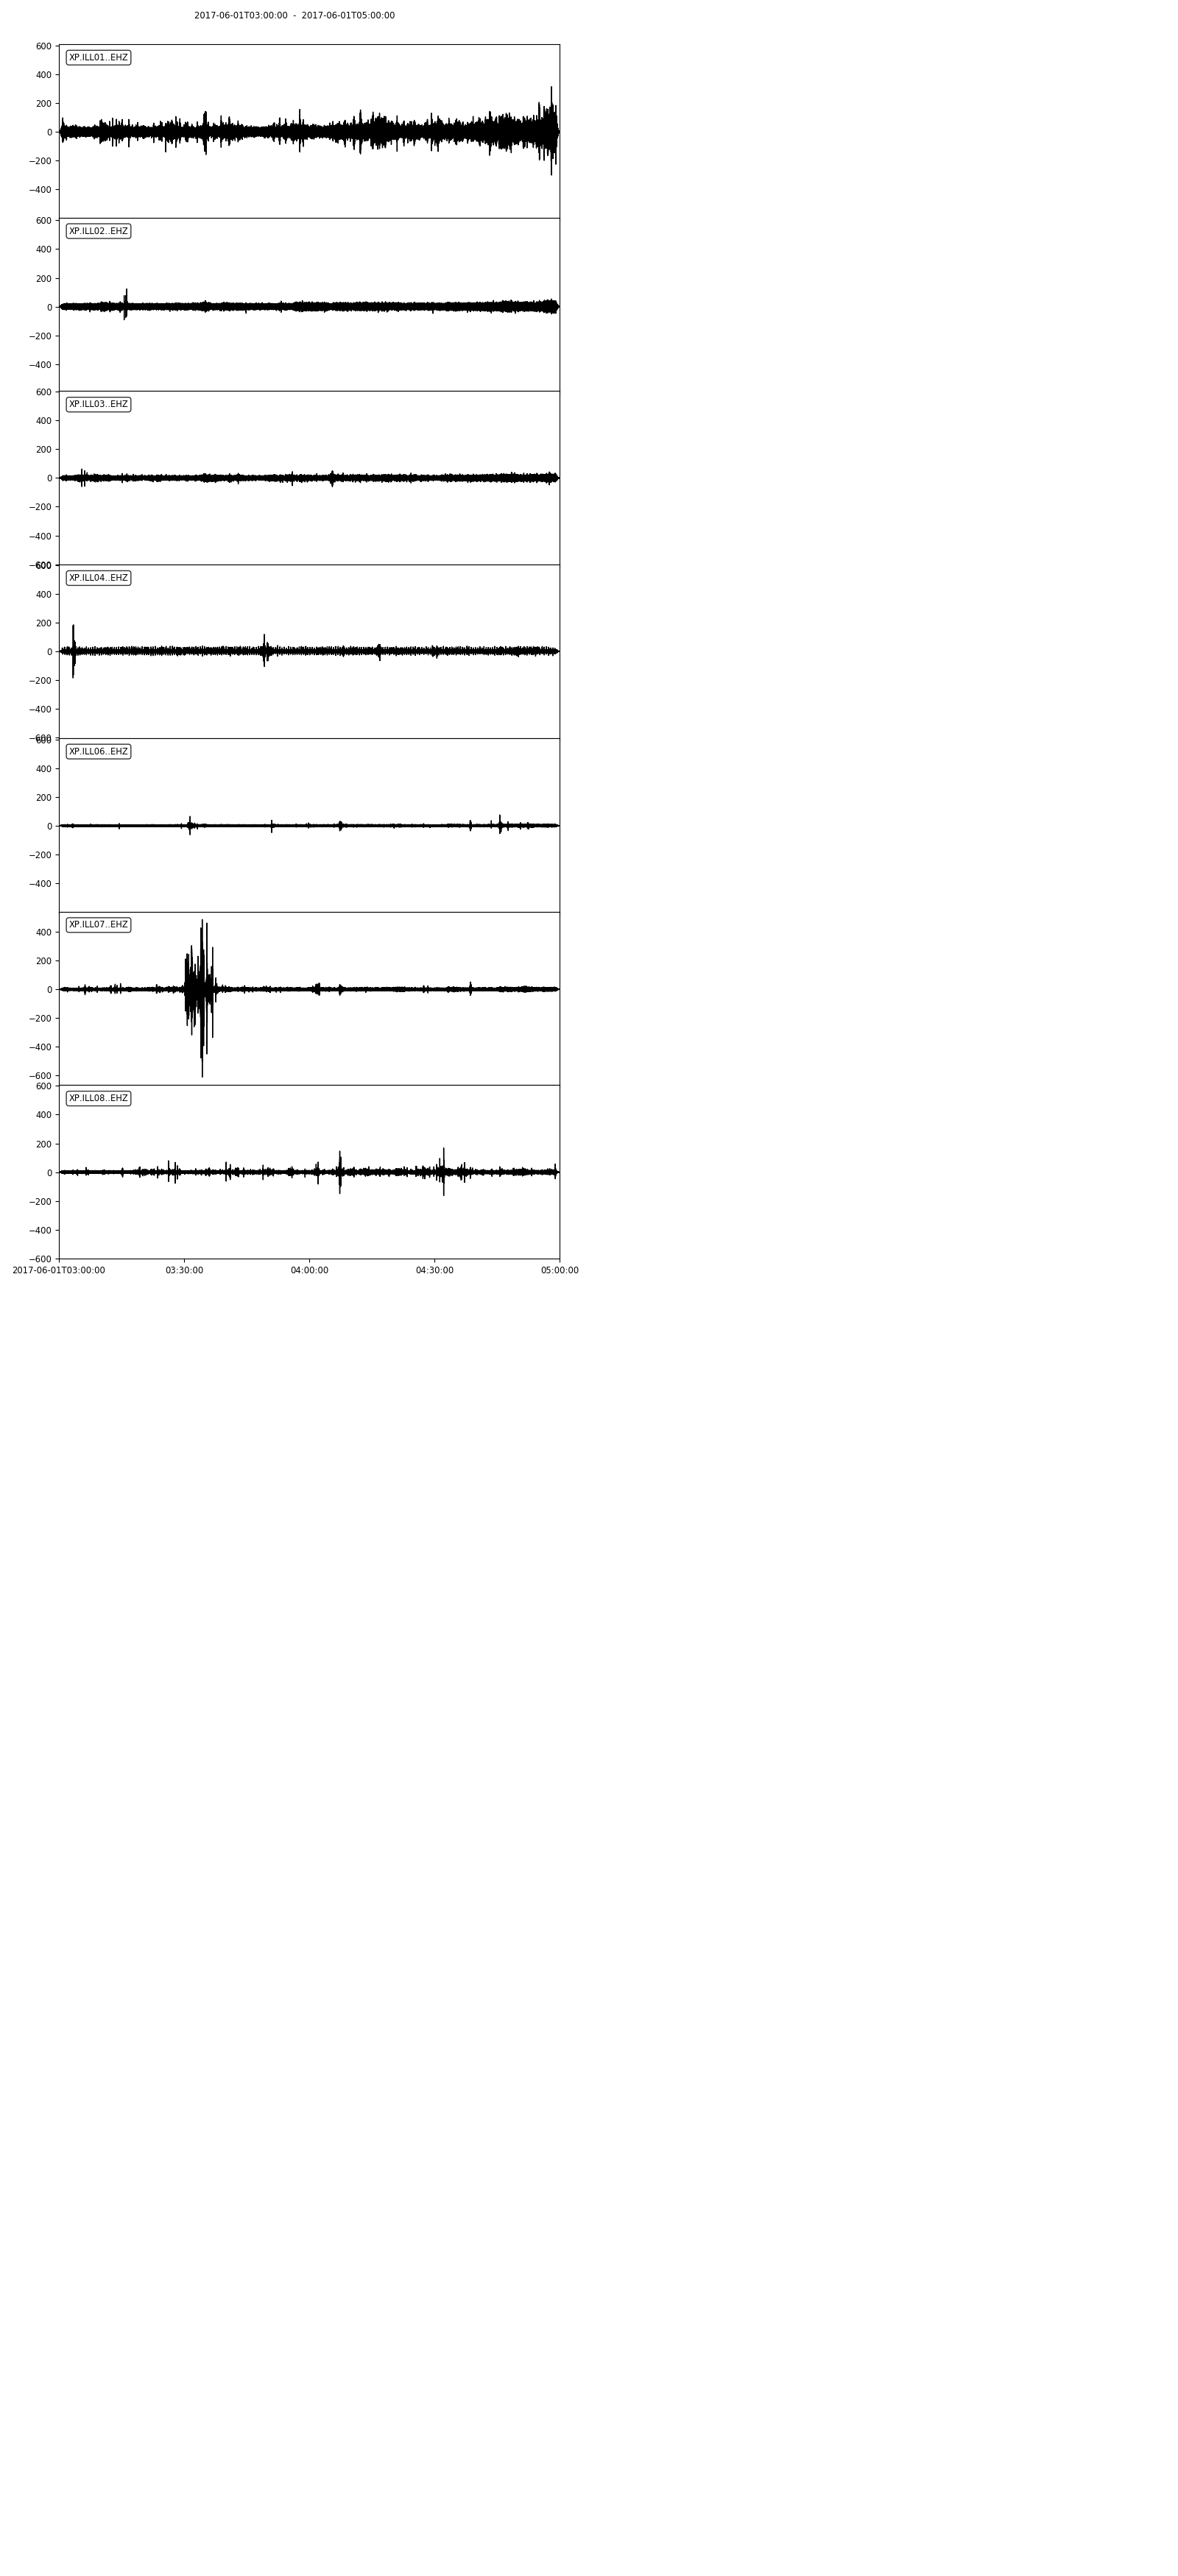

<IPython.core.display.Javascript object>


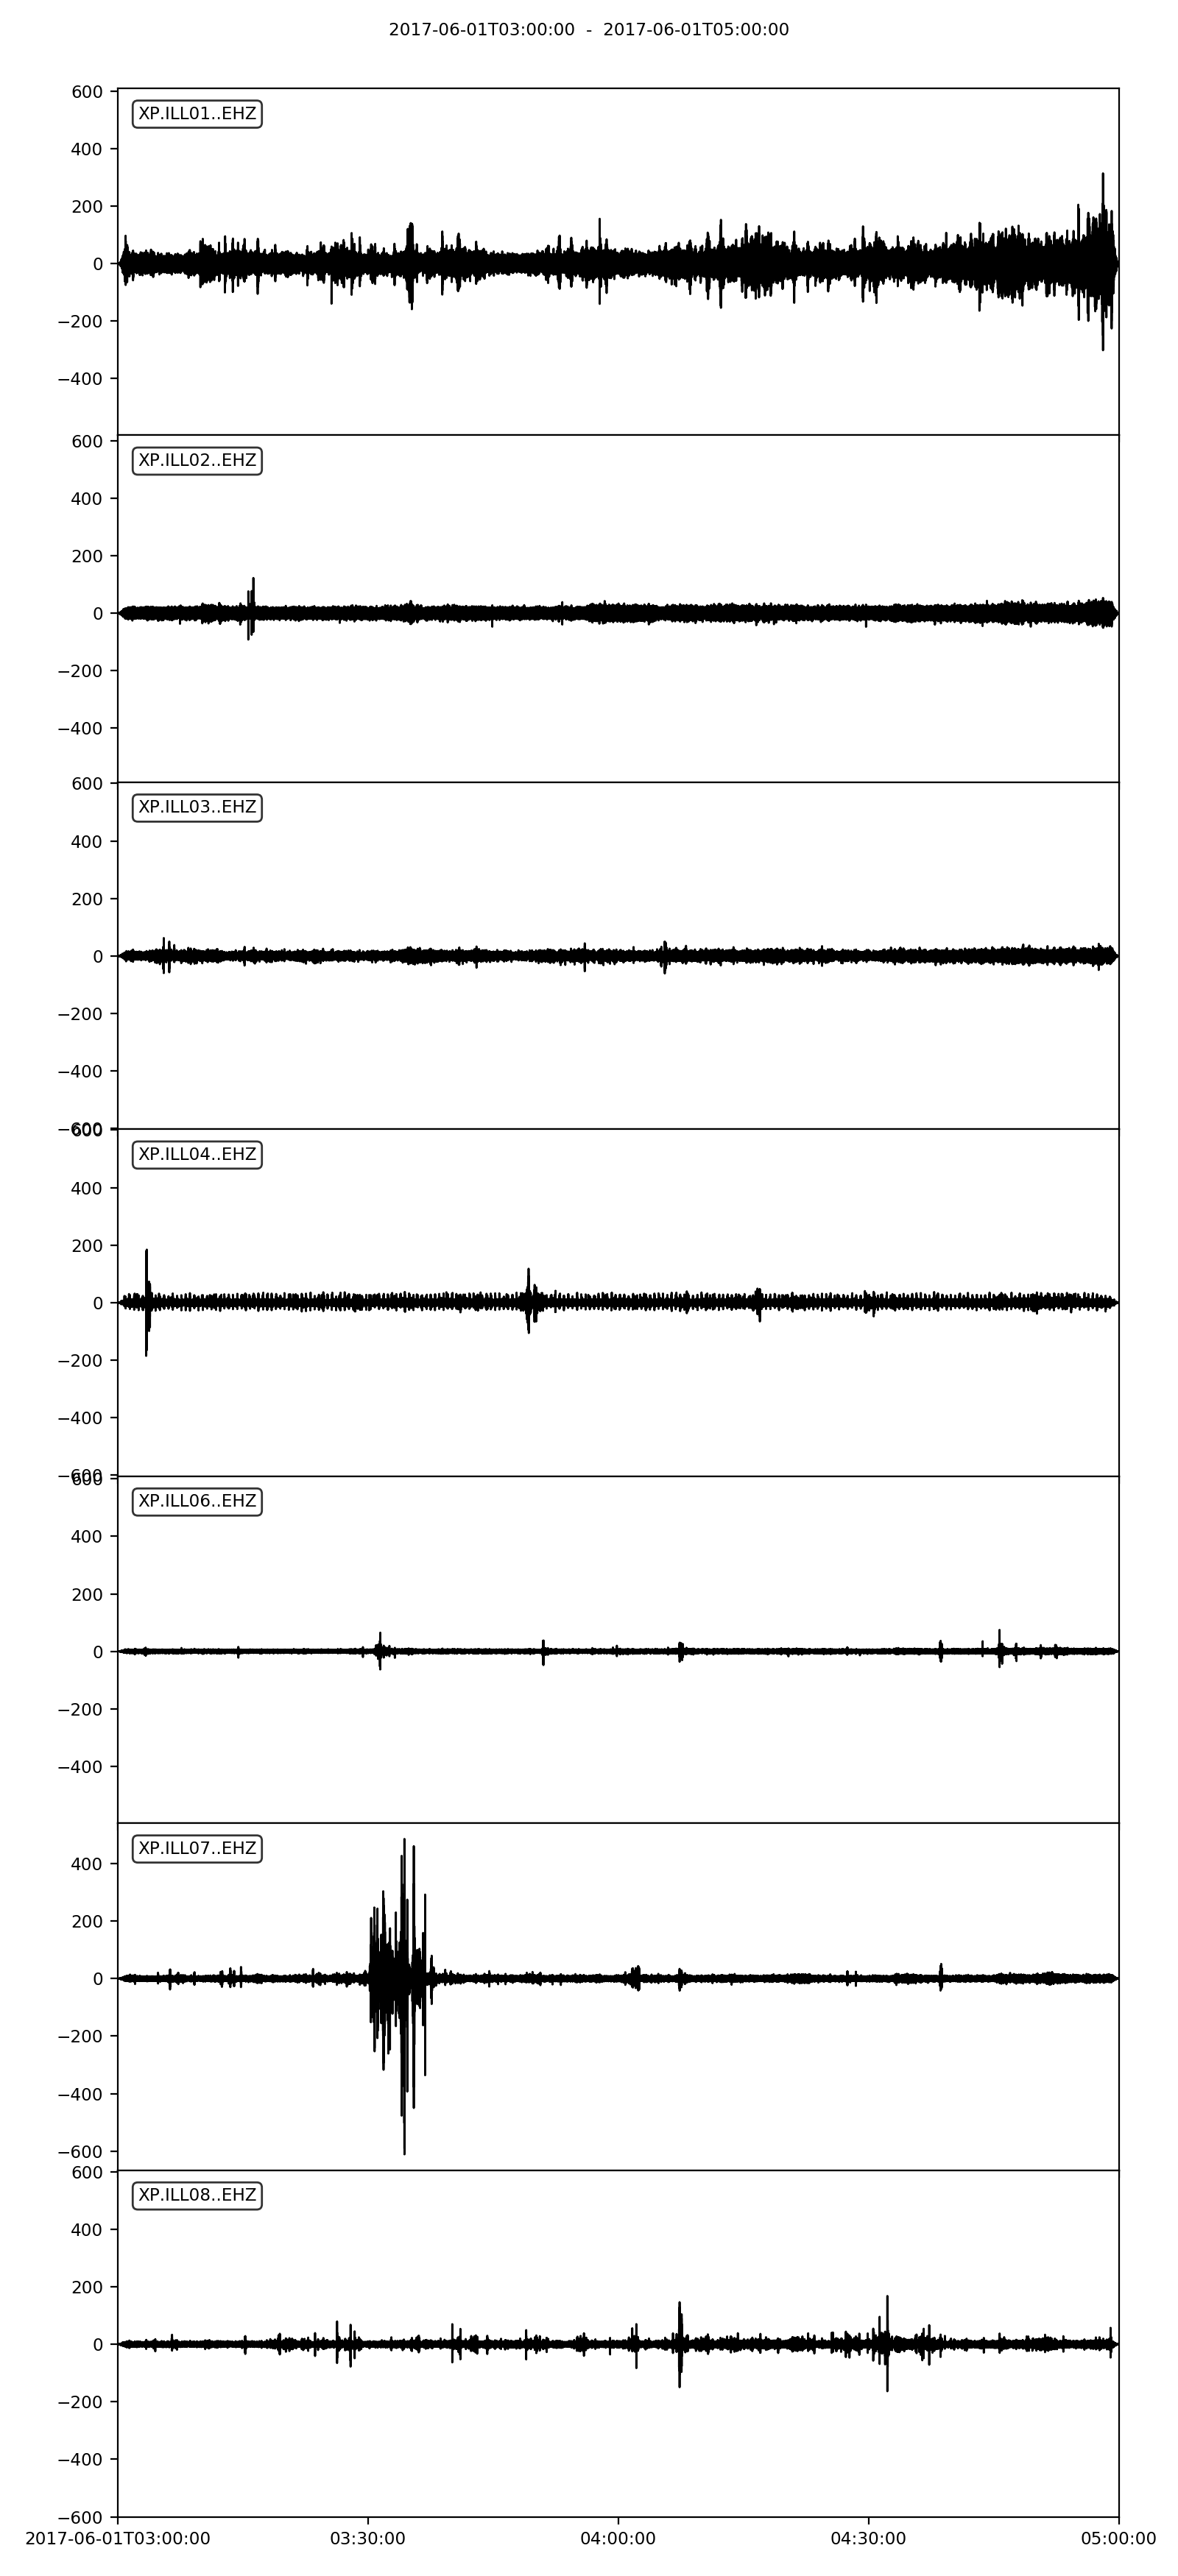

In [12]:
# Eine schnelle Darstellung der Seismogramme kann man mit der obspy Funktion plot erhalten. 
# *A* Um einen konstanten Offset zu entfernen, wenden wir zuerst einen Hochpassfilter mit tiefer Eckfrequenz an.
# Wieso ist das sinnvoll? Um diesen Effekt zu sehen, am Besten den Hochpassfilterbefehl herauskommentieren
# und sehen was geschieht.
st_load.filter("highpass", freq=1) # Für das längere Murgangsignal freq=0.005 setzen.
st_load.plot(method='full')


<IPython.core.display.Javascript object>


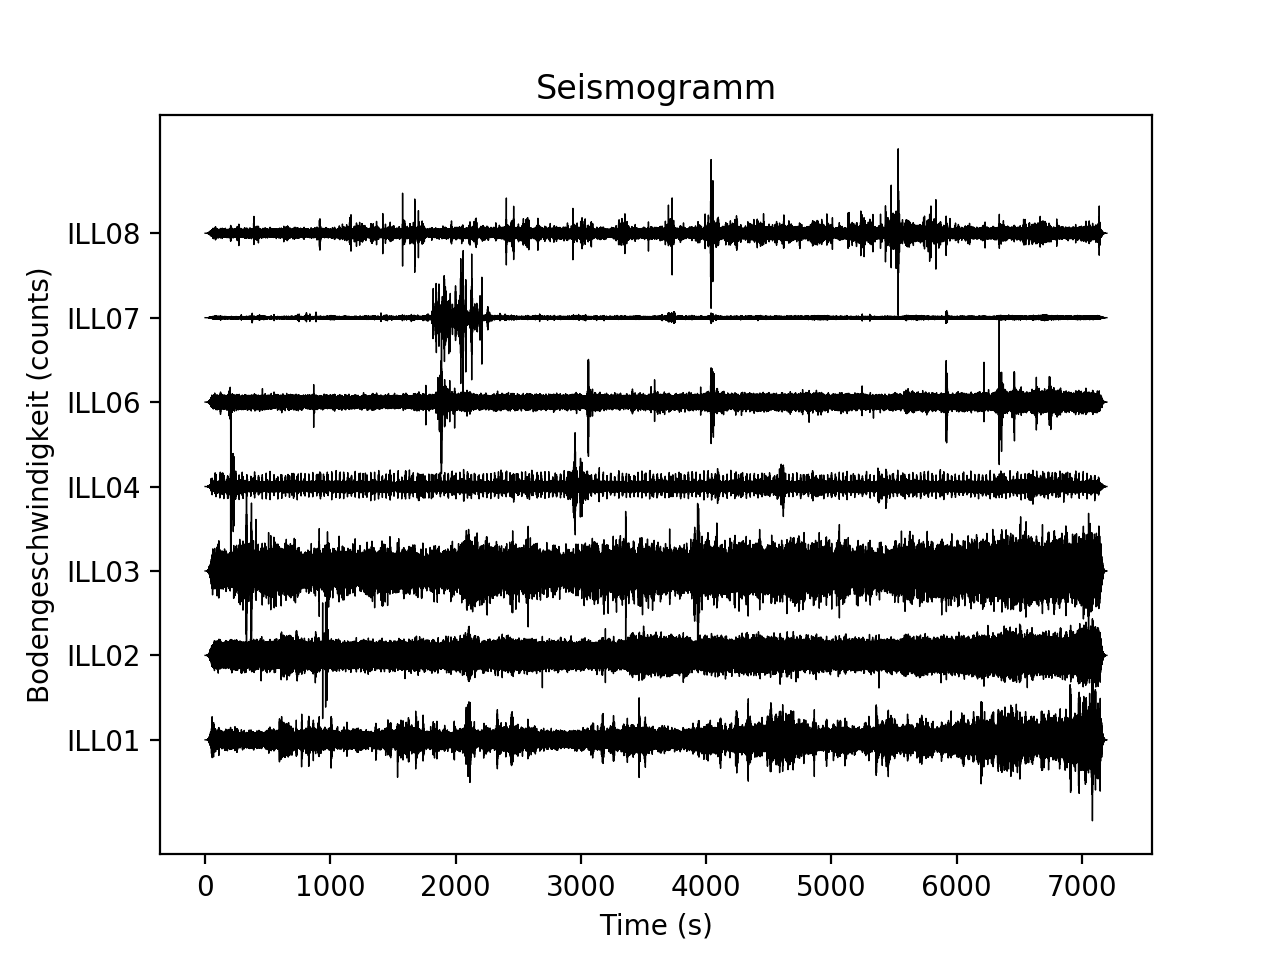

In [13]:
# Der obspy Plot ist nicht immer hilfreich, besonders wenn mehrere Stationen abgebildet werden.
# Hiere eine Möglichkeit, die normalisierten Seismogramme untereinander zu plotten.

# Wir verwenden das Paket matplotlib, das als "plt" importiert wurde.
fig = plt.figure()
i=0
ytl=[]
for tr in st_load:
    tr.taper(0.01, type='hann', max_length=None) # Was macht dieser Taper?
    t = np.arange(tr.stats.npts) * tr.stats.delta
    ytl.append(tr.stats.station)
    plt.plot(t,tr.data/np.max(np.abs(tr.data))+i,c='k',linewidth=0.5)
    i=i+1
plt.xlabel('Time (s)')
plt.ylabel('Bodengeschwindigkeit (counts)')
plt.title('Seismogramm')
plt.yticks(np.arange(len(st_load)),ytl)
plt.show()


In [14]:
# Die Seismogramme sehen häufig sehr verrauscht aus mit vielen transienten Signalen. Dies ist ein verbreitetes
# Problem im Alpinen Raum, wo Industrie, Tourismus, Landwirtschaft und Verkehr das Hintergrundrauschen beeinflussen.
# Besonders bei den relativ schwachen Signalen der kleinen Massenbewegung und des teleseismischen Erdbebens
# erkennt man starke Rauschsignale.

# *A*: Welche Signale könnten jene der Massenbewegung und des teleseismischen Erdbebens sein?
# In der nächsten Zelle steht die Lösung für die Massenbewegung. 

# Wir möchten uns eine Station (am Besten ILL08 bzw. ILL18) genauer anschauen.

st=st_load.select(station="ILL08")
st

1 Trace(s) in Stream:
XP.ILL08..EHZ | 2017-06-01T03:00:00.000000Z - 2017-06-01T05:00:00.000000Z | 100.0 Hz, 720001 samples

<IPython.core.display.Javascript object>


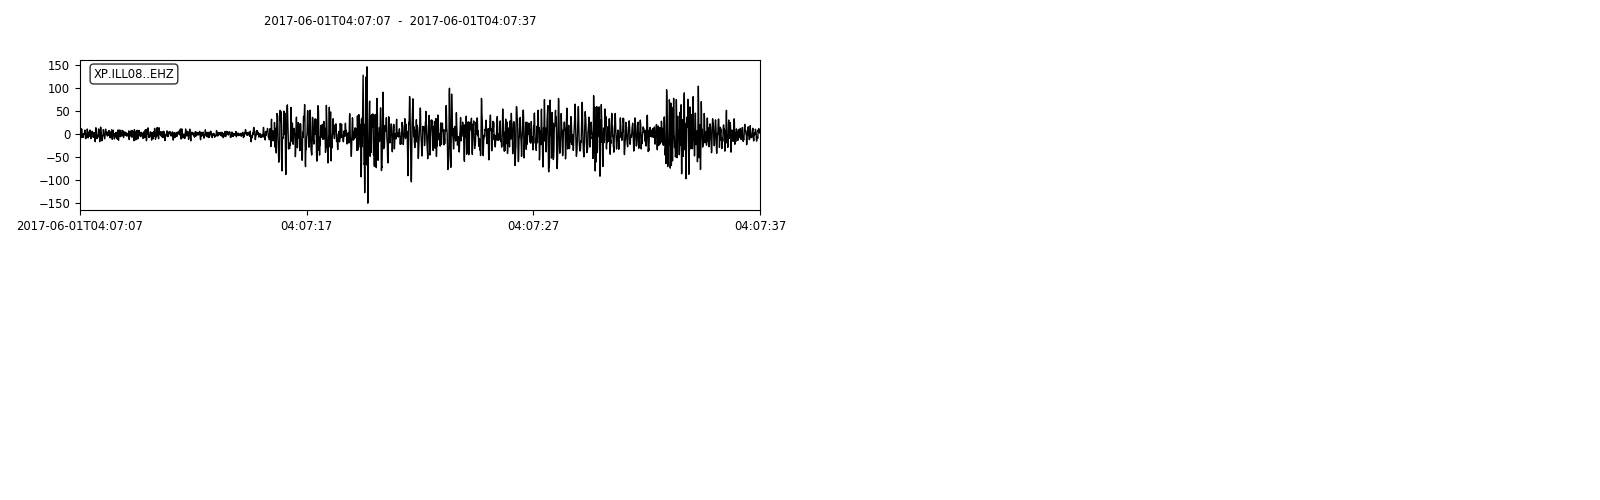

<IPython.core.display.Javascript object>


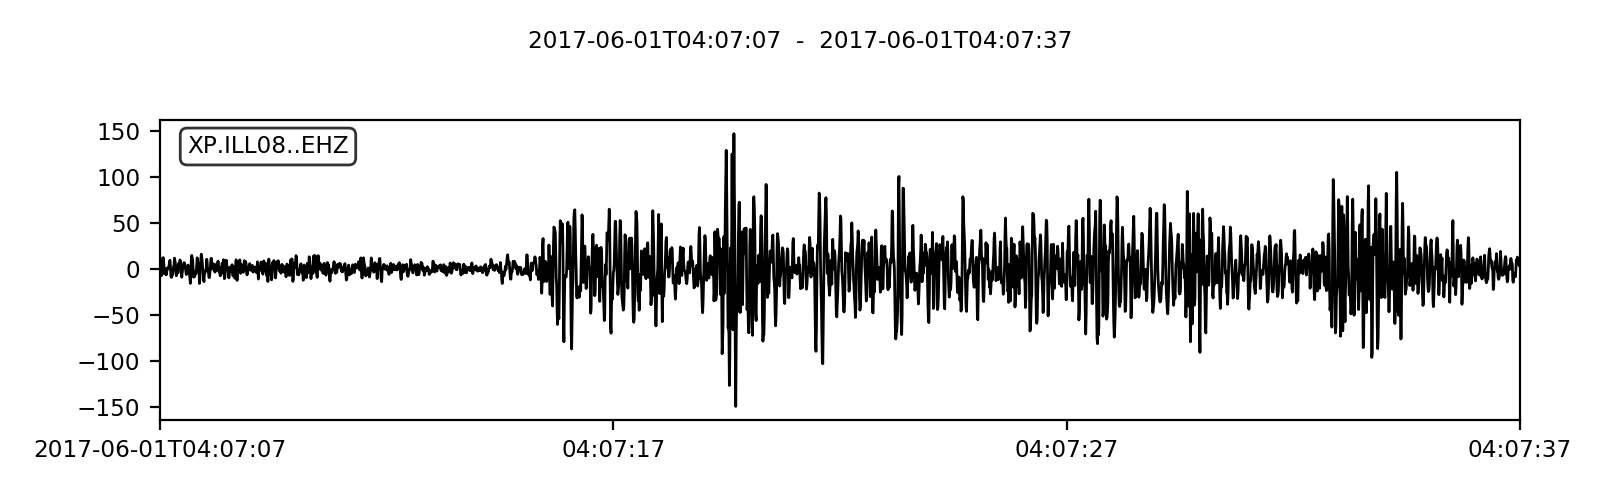

In [15]:
# Ggf. sollte das gewünschte Signal vor dem Plotten herausgeschnitten werden.

# Teleseismisches Beben:
#t_event = UTCDateTime("2017-05-24T10:30:00")
#st = st.slice(t_event, t_event + 600)
#st.plot()

# Massenbewegung:
t_event = UTCDateTime("2017-06-01T04:07:07")
st = st.slice(t_event, t_event + 30)
st.plot()

# Achtung: Der Code in dieser Zelle hängt vom Ereignis ab und soll
# für die anderen Seismogramme herauskommentiert oder angepasst werden.

<IPython.core.display.Javascript object>


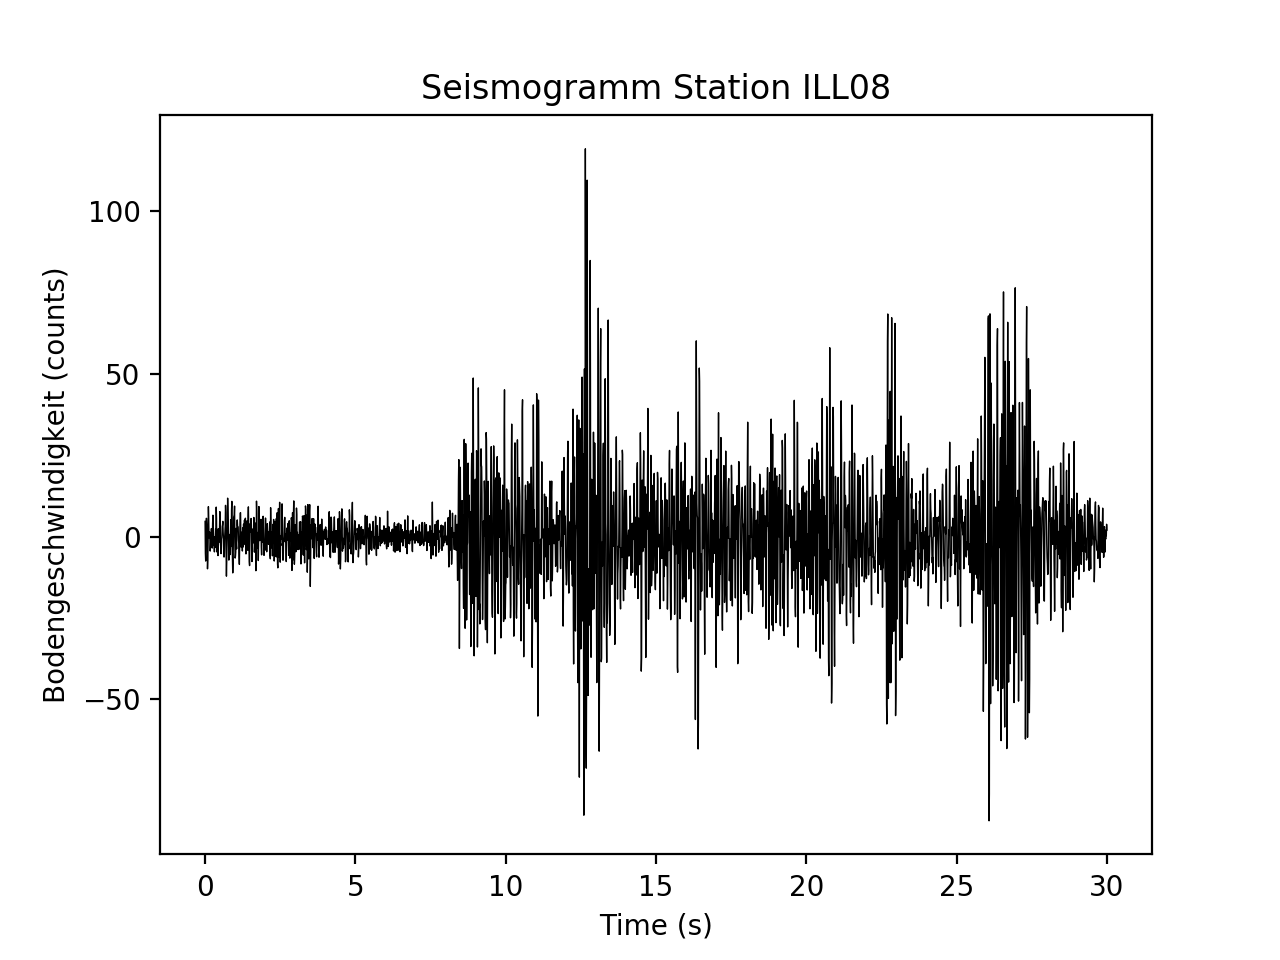

In [16]:
# Man kann jetzt schon ein wenig mit Bandpassfiltern herumspielen, um zu sehen, auf welchen Frequenzen das
# Signal zu finden ist. Vorher erstellen wir eine Kopie des Stream Objektes.

st_filt=st.copy()
st_filt.filter(type="bandpass", freqmin=10, freqmax=49) # Gut für 1 Hz Seismometer.
# st_filt.filter(type="bandpass", freqmin=0.005, freqmax=0.1) # Gut für Breitbandseismometer.
tr=st_filt[0]

t = np.arange(tr.stats.npts) * tr.stats.delta

fig = plt.figure()
#plt.plot(st[0].data)
plt.plot(t,tr.data,c='k',linewidth=0.5)
plt.xlabel('Time (s)')
plt.ylabel('Bodengeschwindigkeit (counts)')
plt.title('Seismogramm Station '+tr.stats.station)
plt.show()

In [17]:
# Nun schauen wir uns genauer das Spektrum des Signales an. Wir arbeiten mit einem Trace Objekt.
# Wir müssen die Zeitreihe extrahieren sowie Zeit- und Frequenzvektor konstruieren.

tr=st[0]
taxis = np.arange(tr.stats.npts) * tr.stats.delta
tr.taper(0.01, type='hann', max_length=None) # Warum der Taper?
data = tr.data # Die seismische Zeitreihe
fs = tr.stats.sampling_rate #sampling rate



<IPython.core.display.Javascript object>


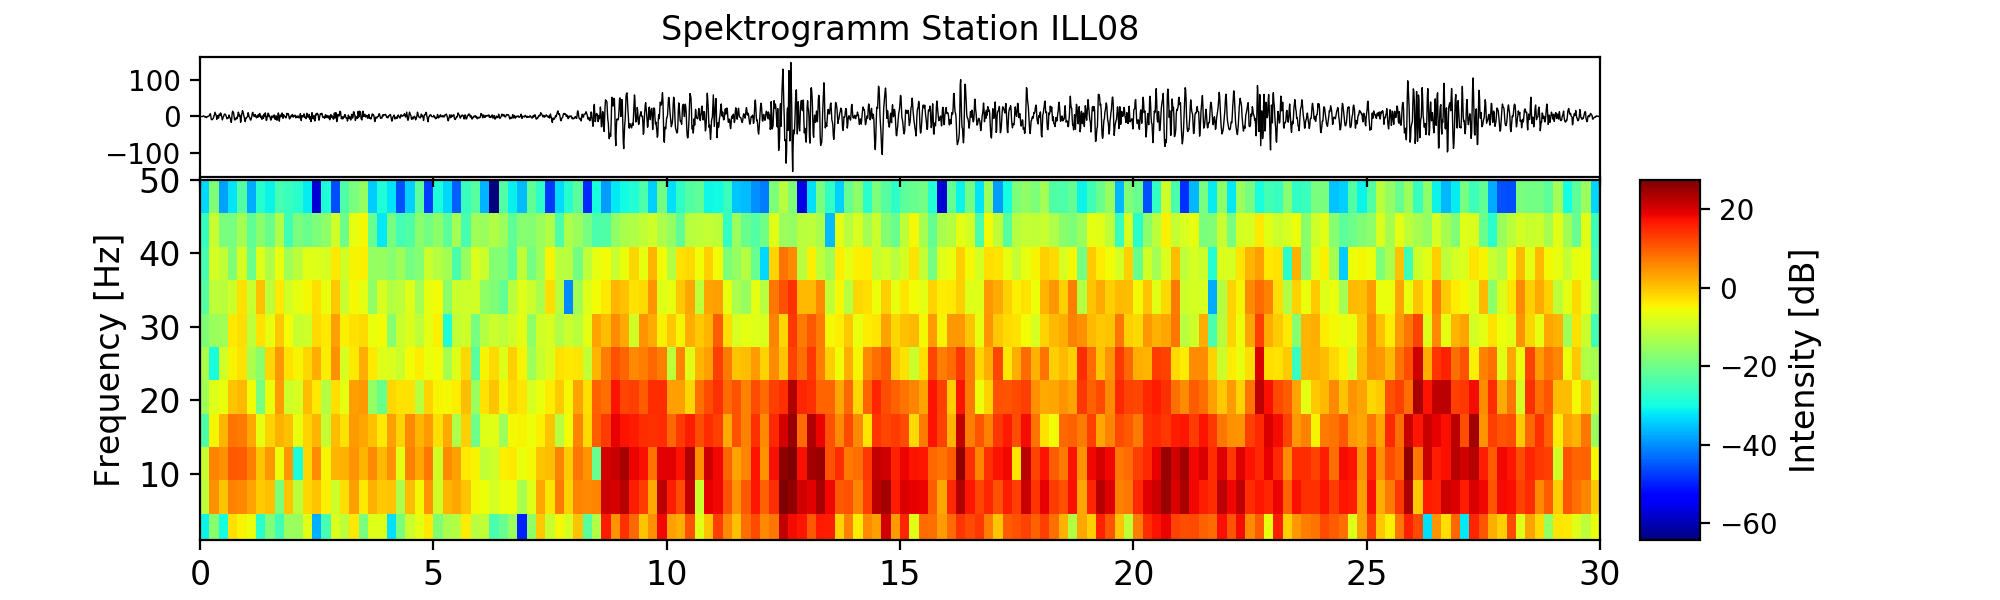

In [19]:
# Nun plotten wir ein erstes Spektrogramm. Für die Massenbewegung können die existierenden
# Werte übernommen werden. Anschliessend sollten die Werte verändert werden, um deren
# Rolle für eine gute Darstellung zu erkennen.

fft_sec=0.2

overlap=0 # Anzahl Messpunkte im overlap
NFFT = fs * fft_sec # Länge der FFT."
fig = plt.figure(figsize=(10,3)) #create figure and add axes to it\n",
ax1 = fig.add_axes([0.1, 0.1, 0.7, 0.60]) #[left bottom width height]\n",
ax2 = fig.add_axes([0.1, 0.705, 0.7, 0.20]) #[left bottom width height]\n",
ax3 = fig.add_axes([0.82, 0.1, 0.03, 0.60]) #[left bottom width height]\n",

###############################
### Spektrogramm plotten. Dieser Codeblock muss nicht verändert werden. Es werden
# typische Werde, Farbskalen und Achsen-Ticks gesetzt.
Pxx, freqs, bins, im = ax1.specgram(data, NFFT=int(NFFT), Fs=fs, noverlap=overlap, #overlap of bins in samples
                                    detrend='linear', #detrending before taking fourier transform
                                    mode='psd', #'psd', 'magnitude', 'angle', 'phase'
                                    scale_by_freq=True, #unit/Hz
                                    scale='dB', #'linear', 'dB'
                                    cmap='jet')#, #'viridis', #your favourite colormap
my_times = [(tr.stats.starttime + i).timestamp for i in bins]
def timeTicks(my_times, pos):
        return datetime.datetime.utcfromtimestamp(my_times).strftime("%Y-%m-%d:%H:%M:%S")
formatter = ticker.FuncFormatter(timeTicks)
###############################

# Hinzufügen des Seismogramms über dem Spektrogramm.
ax2.plot(taxis,data,'k',linewidth=0.5)

# Achsenbeschriftung und Manipulieren der Skalen.
ax1.set_xlabel('Time [s]', fontsize=12) #x-label
ax1.set_ylabel('Frequency [Hz]', fontsize=12) #y-label
ax1.tick_params(axis='both', labelsize=12)

ax1.set_ylim([1.0,fs/2]) #be carefull with lower limit when y-scale is logarithmic
#ax1.set_yscale('log') #uncomment for logarithmic y-scale

ax1.get_shared_x_axes().join(ax1, ax2)
ax1.set_xlim([np.min(taxis),np.max(taxis)])
ax2.set_title('Spektrogramm Station '+tr.stats.station)
ax2.axes.xaxis.set_ticklabels([])

# Zufügen der Farbskala.
cbar = plt.colorbar(im, cax=ax3) #map colorbar to image (output of specgram), plot it on ax3
cbar.set_label('Intensity [dB]', fontsize=12) #colorbar label


# *A*: Was passiert, wenn man die Länge des Gleitfensters verändert?
# *A*: Wie beeinflusst die Länge des Gleitfensters die Frequenz- und Zeitauflösungen? Wieso?
# *A*: Für das Murgangsignal: ILL11 ist ein 120 Sekunden Breitbandseismometer. D.h., dass die
#      Eigenfrequenz bei 1/120 s liegt. Dadurch kann es sehr tiefe Frequenzen auflösen.
#      Wie sieht das Spektrum unterhalb von 1 Hz aus?
                

<IPython.core.display.Javascript object>


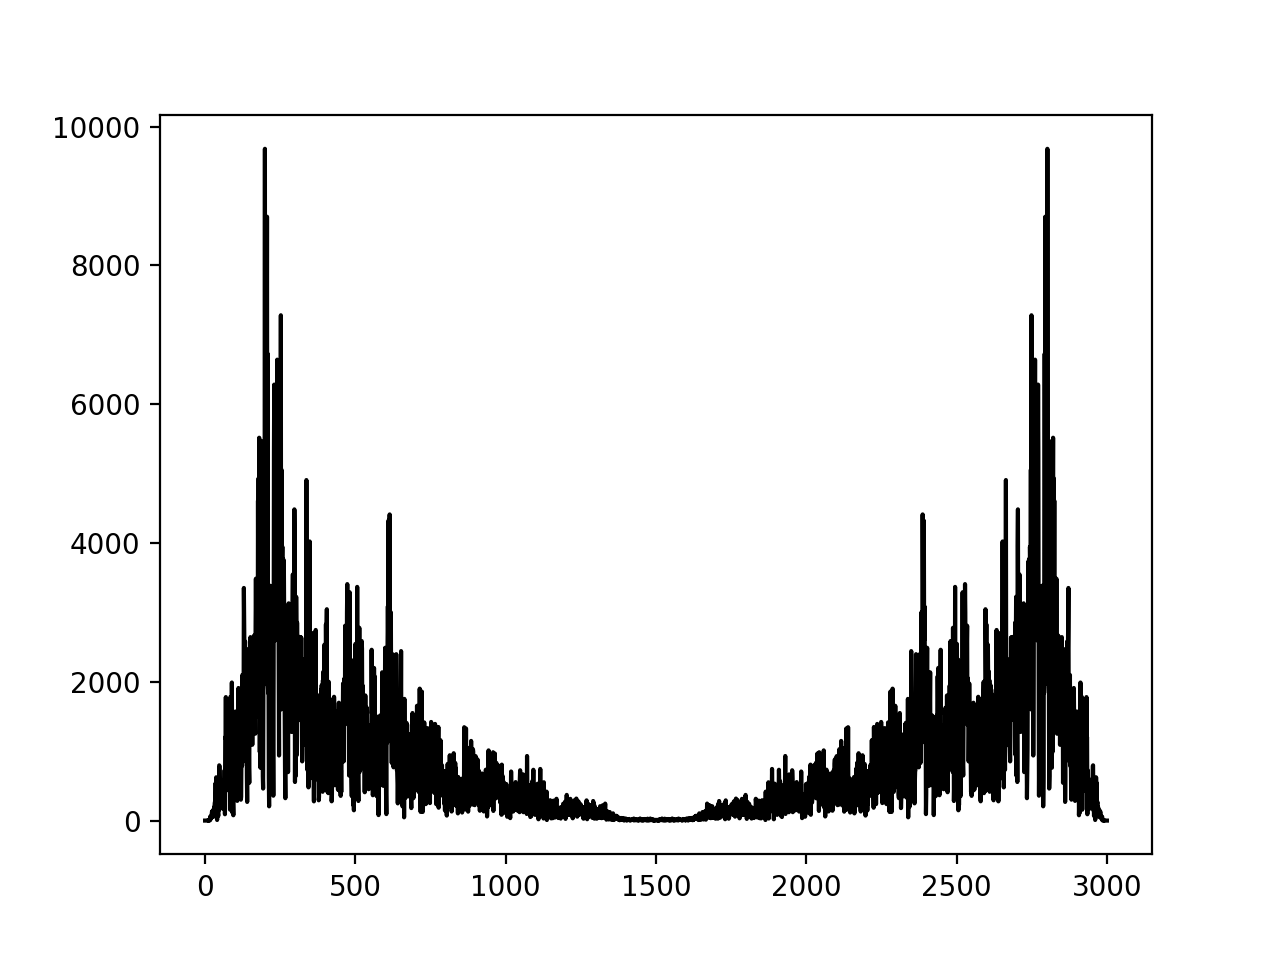

In [20]:
# Jetzt berechnen wir die Fouriertransformierte, anhand derer wir das
# Amplitudenspektrum plotten.
Y=np.fft.fft(data)
T=1/fs
N=Y.shape[0]

freq = np.linspace(0.0, fs/2.0, int(N/2))

# Zuerst einen schnellen Plot des Amplitudenspektrums. Was sehen wir?
fig = plt.figure()
plt.plot(np.abs(Y),c='k')




<IPython.core.display.Javascript object>


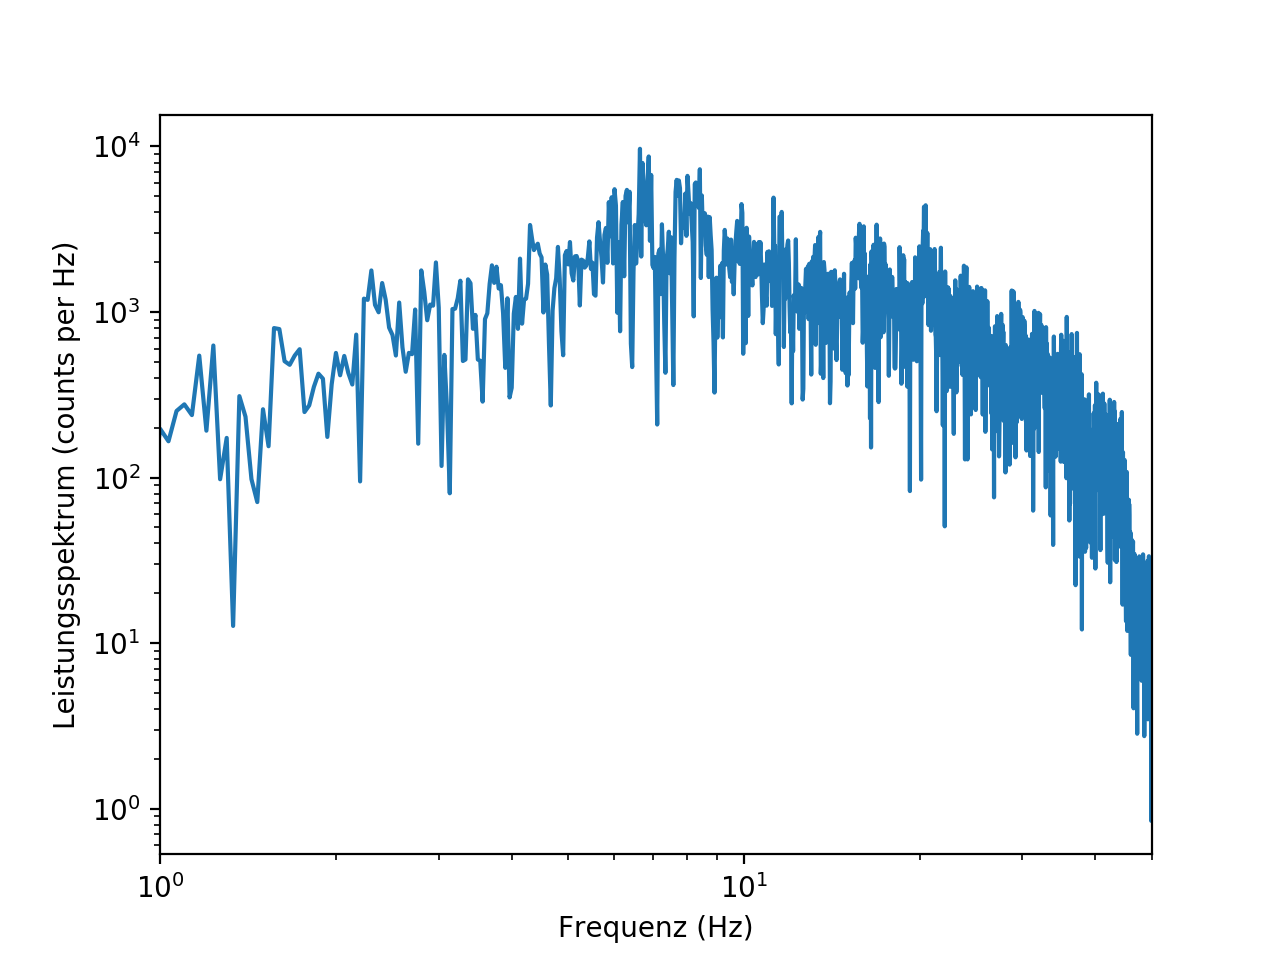

In [21]:
# Noch einmal das Spektrum sauber plotten.
Y=np.fft.fft(data)
T=1/fs
N=Y.shape[0]

freq = np.linspace(0.0, fs/2.0, int(N/2))

fig = plt.figure() #create figure and add axes to it\n",
plt.plot(freq,np.abs(Y[0:len(freq)]))
plt.xlim(1,fs/2)
plt.xlabel('Frequenz (Hz)')
plt.ylabel('Leistungsspektrum (counts per Hz)')

# Mal probieren
plt.xscale('log')
plt.yscale('log')



# Weitere Aufgaben

Jetzt sollen entsprechend die anderen Signale angeschaut und folgende
Signaleigenschaften untersucht werden: Amplituden, Signallänge, Frequenzband und stärkste Frequenz.

Wie unterscheiden sich die Einsätze der Erdbeben vom Murgang und der
kleineren Massenbewegung?
Wie sehen die tiefen Frequenzen beim Murgangsignal auf dem Breitbandseismometer ILL11 aus
(siehe auch Fragen bei der Zelle zum Plotten des Spektrogramms)? Was können dies für
Signale sein?

Tips: Man kann die Farbskala im Spektrogramm anpassen, indem man die Parameter vmin und vmax setzt.